In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,NaN,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	19
float64		column 3	38
float64		column 4	57
float64		column 5	57
float64		column 6	38
float64		column 7	19
float64		column 8	38


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,749.000000,730.000000,711.000000,711.000000,730.000000,749.000000,730.000000
mean,3.793151,120.847797,68.830137,20.443038,77.218003,31.960548,0.469700,33.036986
std,3.302276,31.849845,19.300985,15.529955,112.297299,7.610869,0.331218,11.604597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.400000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.370000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.375000,0.613000,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,57.300000,2.420000,81.000000


<AxesSubplot:>

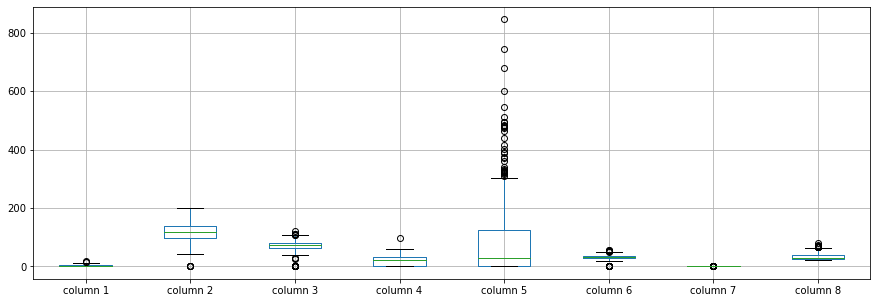

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.793151
column 2    120.847797
column 3     68.830137
column 4     20.443038
column 5     77.218003
column 6     31.960548
column 7      0.469700
column 8     33.036986
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.137766,0.122410,-0.101542,-0.049153,0.008869,-0.041978,0.522862
column 2,0.137766,1.000000,0.157871,0.042068,0.324074,0.212136,0.144910,0.248758
column 3,0.122410,0.157871,1.000000,0.220329,0.108692,0.293311,0.027789,0.233778
column 4,-0.101542,0.042068,0.220329,1.000000,0.452113,0.372297,0.158969,-0.082048
column 5,-0.049153,0.324074,0.108692,0.452113,1.000000,0.204517,0.196070,-0.037528
column 6,0.008869,0.212136,0.293311,0.372297,0.204517,1.000000,0.141532,0.020046
column 7,-0.041978,0.144910,0.027789,0.158969,0.196070,0.141532,1.000000,0.031801
column 8,0.522862,0.248758,0.233778,-0.082048,-0.037528,0.020046,0.031801,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+58,8+58+58,8+58+58+58,8+58+58+58+58,8+58+58+58+58+58,8+58+58+58+58+58+58,8+58+58+58+58+58,8+58+58+58+58,8+58+58+58,8+58+58,8+58,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 402.61305300394696
Epoch: 1 , loss: 401.3097616831462
Epoch: 2 , loss: 399.2087408701579
Epoch: 3 , loss: 396.4379240671794
Epoch: 4 , loss: 394.65039316813153
Epoch: 5 , loss: 391.69123967488605
Epoch: 6 , loss: 390.0826422373454
Epoch: 7 , loss: 382.47958691914874
Epoch: 8 , loss: 381.86764971415204
Epoch: 9 , loss: 375.0090637207031
Epoch: 10 , loss: 373.850149790446
Epoch: 11 , loss: 361.9045174916585
Epoch: 12 , loss: 363.9525540669759
Epoch: 13 , loss: 356.04146575927734
Epoch: 14 , loss: 347.6946687698364
Epoch: 15 , loss: 344.71604029337567
Epoch: 16 , loss: 332.69648297627765
Epoch: 17 , loss: 336.95743560791016
Epoch: 18 , loss: 328.29824765523273
Epoch: 19 , loss: 320.66670831044513
Epoch: 20 , loss: 314.8933579126994
Epoch: 21 , loss: 312.07277965545654
Epoch: 22 , loss: 310.986125310262
Epoch: 23 , loss: 302.9188985824585
Epoch: 24 , loss: 304.35030873616535
Epoch: 25 , loss: 304.8978430430

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    44.384647
column 3    84.000000
column 4     0.000000
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.713072,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
764,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
765,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
766,0.000000,0.0,0.0,26.618816,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1357.1061005252893, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.23493260403130323

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.0,72.0,35.000000,0.0,33.6,0.627,50.0
1,2.713072,85.0,66.0,29.000000,0.0,26.6,0.351,31.0
2,8.000000,183.0,64.0,0.000000,0.0,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.000000,94.0,28.1,0.167,21.0
4,0.000000,137.0,40.0,35.000000,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.0,32.9,0.171,63.0
764,2.000000,122.0,70.0,27.000000,0.0,36.8,0.340,27.0
765,5.000000,121.0,72.0,23.000000,112.0,26.2,0.245,30.0
766,1.000000,126.0,60.0,26.618816,0.0,30.1,0.349,47.0


In [21]:
imputations[-1].to_excel("PID_NL_5.xlsx", index=False, header=False)